In [2]:
import numpy
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import abs_path

## Data Understanding

In [3]:
data_path = abs_path('train.csv', 'data')
df = pd.read_csv(data_path)

In [4]:
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,\N,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,\N,\N,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,\N,\N,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,\N,\N,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020,80,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [5]:
df.shape

(16431, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16431 non-null  object 
 1   rating                       16431 non-null  object 
 2   startYear                    16431 non-null  int64  
 3   endYear                      16431 non-null  object 
 4   runtimeMinutes               16431 non-null  object 
 5   awardWins                    13813 non-null  float64
 6   numVotes                     16431 non-null  int64  
 7   worstRating                  16431 non-null  int64  
 8   bestRating                   16431 non-null  int64  
 9   totalImages                  16431 non-null  int64  
 10  totalVideos                  16431 non-null  int64  
 11  totalCredits                 16431 non-null  int64  
 12  criticReviewsTotal           16431 non-null  int64  
 13  titleType       

In [7]:
df.columns.values.tolist()

['originalTitle',
 'rating',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'awardWins',
 'numVotes',
 'worstRating',
 'bestRating',
 'totalImages',
 'totalVideos',
 'totalCredits',
 'criticReviewsTotal',
 'titleType',
 'awardNominationsExcludeWins',
 'canHaveEpisodes',
 'isRatable',
 'isAdult',
 'numRegions',
 'userReviewsTotal',
 'ratingCount',
 'countryOfOrigin',
 'genres']

In [8]:
ascending_df = df.sort_values(by = ["rating"], ascending = False, inplace = False)
ascending_df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
16430,Anniversary Night,"(9, 10]",2022,\N,\N,0.0,9,1,10,7,...,short,0,False,True,0,1,0,9,['IN'],"Drama,Short"
9076,Only Need to Win Once,"(9, 10]",2020,\N,23,NaN,5,1,10,6,...,short,0,False,True,0,1,1,5,['GB'],"Drama,Short"
798,Fairytale,"(9, 10]",2021,\N,\N,NaN,765,1,10,3,...,tvEpisode,0,False,True,0,1,6,767,['AU'],"Animation,Family"
805,George's Marvellous Medicine: The Marvellous Plan,"(9, 10]",1986,\N,15,0.0,40,1,10,1,...,tvEpisode,0,False,True,0,1,0,40,['GB'],"Family,Fantasy"
808,World of Horses,"(9, 10]",2019,\N,60,0.0,12,1,10,7,...,movie,0,False,True,0,1,0,12,['DE'],Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,Espiral,"(0, 1]",2005,\N,25,0.0,8,1,10,1,...,tvSeries,0,True,True,0,1,0,8,['ES'],Documentary
1840,Episode dated 30 March 2010,"(0, 1]",2010,\N,60,NaN,142,1,10,0,...,tvEpisode,0,False,True,0,7,0,142,['US'],"News,Reality-TV,Talk-Show"
347,Kylie Jenner: Billion Dollar Baby,"(0, 1]",2020,\N,\N,0.0,191,1,10,1,...,movie,0,False,True,0,2,0,191,['GB'],"Biography,Documentary"
11127,The Reel Deal,"(0, 1]",1999,\N,\N,NaN,20,1,10,0,...,tvMovie,0,False,True,0,2,0,20,['US'],\N


## Data Preparation

In [9]:
# Check if there are any null values
df.isnull().values.any()

True

In [10]:
# Pandas by default only identifies NaN values as missing
print(df.isnull().sum())

originalTitle                     0
rating                            0
startYear                         0
endYear                           0
runtimeMinutes                    0
awardWins                      2618
numVotes                          0
worstRating                       0
bestRating                        0
totalImages                       0
totalVideos                       0
totalCredits                      0
criticReviewsTotal                0
titleType                         0
awardNominationsExcludeWins       0
canHaveEpisodes                   0
isRatable                         0
isAdult                           0
numRegions                        0
userReviewsTotal                  0
ratingCount                       0
countryOfOrigin                   0
genres                            0
dtype: int64


In [11]:
# Therefore we replace \N values to None to properly deal with them
df.replace('\\N', None, inplace = True)

# Checking if there are any \N left
print(len(df[df.map(lambda x: x == '\\N').any(axis = 1)]))

0


In [12]:
# Check if there are duplicates
df['originalTitle'].is_unique

# The duplicates in the originalTitle column may be instances that refer to products with the same name but different type/genre/year
# not dropping them for now but continuing with our analysis
duplicati = df[df['originalTitle'].duplicated(keep= False)].sort_values('originalTitle')
duplicati.head(100)

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
6658,Abandoned,"(2, 3]",2017,None,4,0.0,26,1,10,1,...,short,0,False,True,0,1,0,26,['RU'],"Horror,Short"
6065,Abandoned,"(8, 9]",1994,None,47,0.0,30,1,10,3,...,tvEpisode,0,False,True,0,1,0,30,['AU'],"Action,Crime,Drama"
1493,Aladdin,"(7, 8]",1993,None,None,0.0,1047,1,10,9,...,videoGame,1,False,True,0,3,3,1047,['US'],"Action,Adventure,Family"
15178,Aladdin,"(6, 7]",1994,None,None,0.0,18,1,10,2,...,videoGame,0,False,True,0,2,0,18,['JP'],"Action,Adventure,Family"
2471,Alone,"(6, 7]",2007,None,12,0.0,10,1,10,1,...,short,0,False,True,0,1,0,10,['US'],"Short,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,Episode #1.1,"(7, 8]",2022,None,55,0.0,145,1,10,12,...,tvEpisode,0,False,True,0,7,0,145,['AU'],"Crime,Drama,Mystery"
12005,Episode #1.1,"(7, 8]",2021,None,48,0.0,194,1,10,182,...,tvEpisode,0,False,True,0,7,4,194,['GB'],"Crime,Thriller"
10939,Episode #1.1,"(7, 8]",2015,None,28,0.0,221,1,10,1,...,tvEpisode,0,False,True,0,7,1,221,['GB'],"Adventure,Crime,Drama"
8634,Episode #1.1,"(6, 7]",2018,None,59,0.0,36,1,10,0,...,tvEpisode,0,False,True,0,7,0,36,['DK'],"Crime,Drama"


In [13]:
distinctive_columns = ['originalTitle', 'startYear', 'titleType', 'countryOfOrigin', 'genres', 'runtimeMinutes']
df_duplicates = duplicati[distinctive_columns]

In [14]:
# Verifying the different versions
'''for titolo in df_duplicates['originalTitle'].unique():
    print(f"\n\nTitolo: {titolo}")
    print("Versioni diverse:")
    display(df_duplicates[df_duplicates['originalTitle'] == titolo])'''

'for titolo in df_duplicates[\'originalTitle\'].unique():\n    print(f"\n\nTitolo: {titolo}")\n    print("Versioni diverse:")\n    display(df_duplicates[df_duplicates[\'originalTitle\'] == titolo])'

In [15]:
# Checking different types of products
df['titleType'].value_counts()

# Checking the mean for each feature
for type in df['titleType'].unique():
    print(type)
    print(df[df['titleType'] == type].describe().iloc[1])
    print(' ')

tvEpisode
startYear                      1997.187101
awardWins                         0.002067
numVotes                        340.473606
worstRating                       1.000000
bestRating                       10.000000
totalImages                       5.591315
totalVideos                       0.047893
totalCredits                     68.822478
criticReviewsTotal                0.629630
awardNominationsExcludeWins       0.001916
isAdult                           0.000213
numRegions                        1.635802
userReviewsTotal                  1.578331
ratingCount                     340.838868
Name: mean, dtype: float64
 
videoGame
startYear                      2000.644788
awardWins                         0.252427
numVotes                        413.355212
worstRating                       1.000000
bestRating                       10.000000
totalImages                       8.729730
totalVideos                       1.061776
totalCredits                     35.444015
criti

In [16]:
# Average rating
# Levo le parentesi dalla colonna
print(df['rating'].isna().sum())

df['rating'] = df['rating'].apply(lambda x: re.sub(r"\]|\(", "", x).strip()) 

# Trasformo la colonna in numero e ritorno la media tra i due numeri
df['rating'] = df['rating'].apply(lambda x: sum(int(i.strip()) for i in x.split(',')) / len(x.split(',')))

# Average rating
df['rating'].describe().iloc[1]


0


6.6556204734952225

In [17]:
# Range of years covered
max_year = df['startYear'].max()
min_year = df['startYear'].min()

range = max_year-min_year

print(f"The dataset covers from {min_year} to {max_year}. A range of {range} years.")

The dataset covers from 1878 to 2024. A range of 146 years.


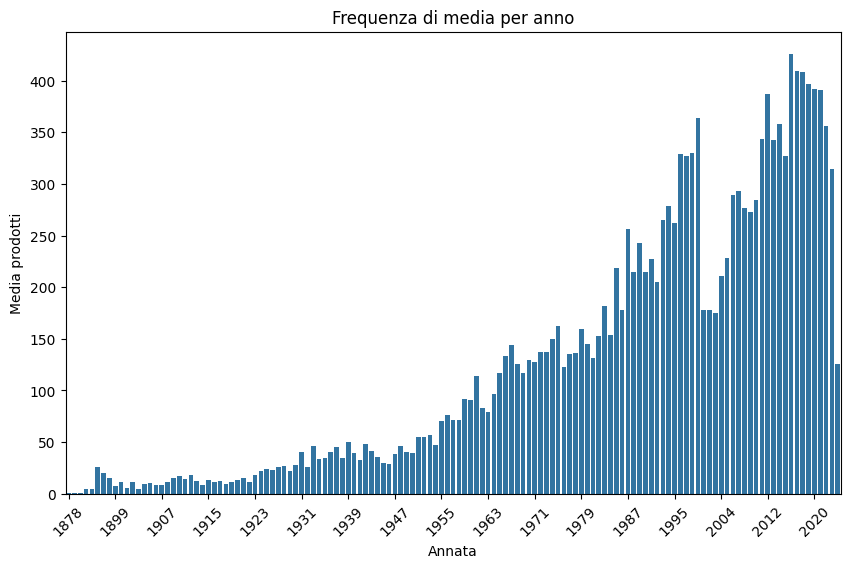

In [18]:
# Lets see if any years are missing
media_by_year = df['startYear'].value_counts().sort_index()

# Lets plot to check distribution
plt.figure(figsize = (10,6))
sns.barplot(x = media_by_year.index, y = media_by_year.values)
plt.title('Frequenza di media per anno')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # mostra max 20 etichette
plt.xlabel('Annata')
plt.ylabel('Media prodotti')
plt.xticks(rotation = 45)
plt.show()


In [19]:
# Checking the amount of media per state
import ast

# Trasformo le stringhe in liste
df_countries = df['countryOfOrigin']
df_countries = df_countries.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# To separate all lists
countries_exploded = df_countries.explode('countryOfOrigin')
conteggio = countries_exploded.value_counts()

# Trasformo in un pandas dataframe
df_counts = conteggio.reset_index()
df_counts.columns = ['countryOfOrigin', 'counts']

df_counts

,countryOfOrigin,counts
0,US,7134
1,GB,1775
2,JP,846
3,FR,826
4,CA,621
...,...,...
148,EH,1
149,NE,1
150,PR,1
151,VA,1


In [20]:
# Using a graph to visualize the distribution
import plotly.express as px

fig = px.scatter(df_counts, x='countryOfOrigin', y='counts', log_y=True)
fig.update_layout(title='Counts of instances for each State on a log scale',
                  xaxis_title='Country of Origin',
                  yaxis_title='Counts')
fig.show()

In [21]:
# Dealing with the genres column
# Creating boolean columns for each genres where 1=the type is of that genre
print(df['genres'].isna().sum())
df['genres'] = df['genres'].fillna('')

382


In [22]:
#generi_dummies = df['genres'].str.get_dummies(sep=',')

#df = pd.concat([df.drop('genres', axis=1), generi_dummies], axis=1)

In [23]:
#df.drop('isAdult', axis = 1)

In [24]:
# Checking the max number of genres present for a single instance
generi_split = df['genres'].str.split(',', expand=True)
print(generi_split.value_counts())


0          1            2        
Action     Adventure    Animation    320
Crime      Drama        Mystery      292
Action     Crime        Drama        230
Comedy     Drama        Romance      197
Animation  Comedy       Family       157
                                    ... 
Biography  Documentary  Fantasy        1
           Crime        Thriller       1
           Comedy       History        1
                        Crime          1
Sci-Fi     Short        Western        1
Name: count, Length: 560, dtype: int64


In [25]:
generi_split.columns = ['genere_1', 'genere_2', 'genere_3']

df = pd.concat([df.drop('genres', axis=1), generi_split[['genere_1', 'genere_2', 'genere_3']]], axis=1)

In [26]:
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genere_1,genere_2,genere_3
0,Neogenic Nightmare Chapter 3: Hydro-Man,7.5,1995,None,None,0.0,779,1,10,1,...,False,True,0,1,0,781,['US'],Action,Adventure,Animation
1,Looping,5.5,1982,None,None,0.0,11,1,10,1,...,False,True,0,1,0,11,['XWG'],Action,None,None
2,Idealnaya para,5.5,1992,None,None,0.0,38,1,10,1,...,False,True,0,1,1,38,['RU'],Comedy,None,None
3,MasterChef Celebrity México,5.5,2021,None,None,0.0,15,1,10,22,...,True,True,0,1,0,15,['MX'],Reality-TV,None,None
4,Seutateueob,7.5,2020,2020,80,1.0,15718,1,10,347,...,True,True,0,32,452,15746,['KR'],Comedy,Drama,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,5.5,1942,None,None,0.0,73,1,10,4,...,False,True,0,14,4,73,['FR'],Comedy,None,None
16427,Haar Jeet,4.5,1990,None,None,0.0,15,1,10,2,...,False,True,0,1,1,15,['IN'],Action,Drama,Thriller
16428,Kotigobba 3,5.5,2021,None,140,0.0,2560,1,10,39,...,False,True,0,5,49,2560,['IN'],Action,Drama,Romance
16429,Ator l'invincibile,3.5,1982,None,None,0.0,3011,1,10,52,...,False,True,0,26,58,3012,['IT'],Action,Adventure,Fantasy


In [27]:
df['genere_1'].isna().sum()

0

In [38]:
df['genere_2'].isna().sum()

6325

In [39]:
df['genere_3'].isna().sum()

11324

controllare correlazione tra i generi ed eventualmente prendere il primo

#### Feature Selection

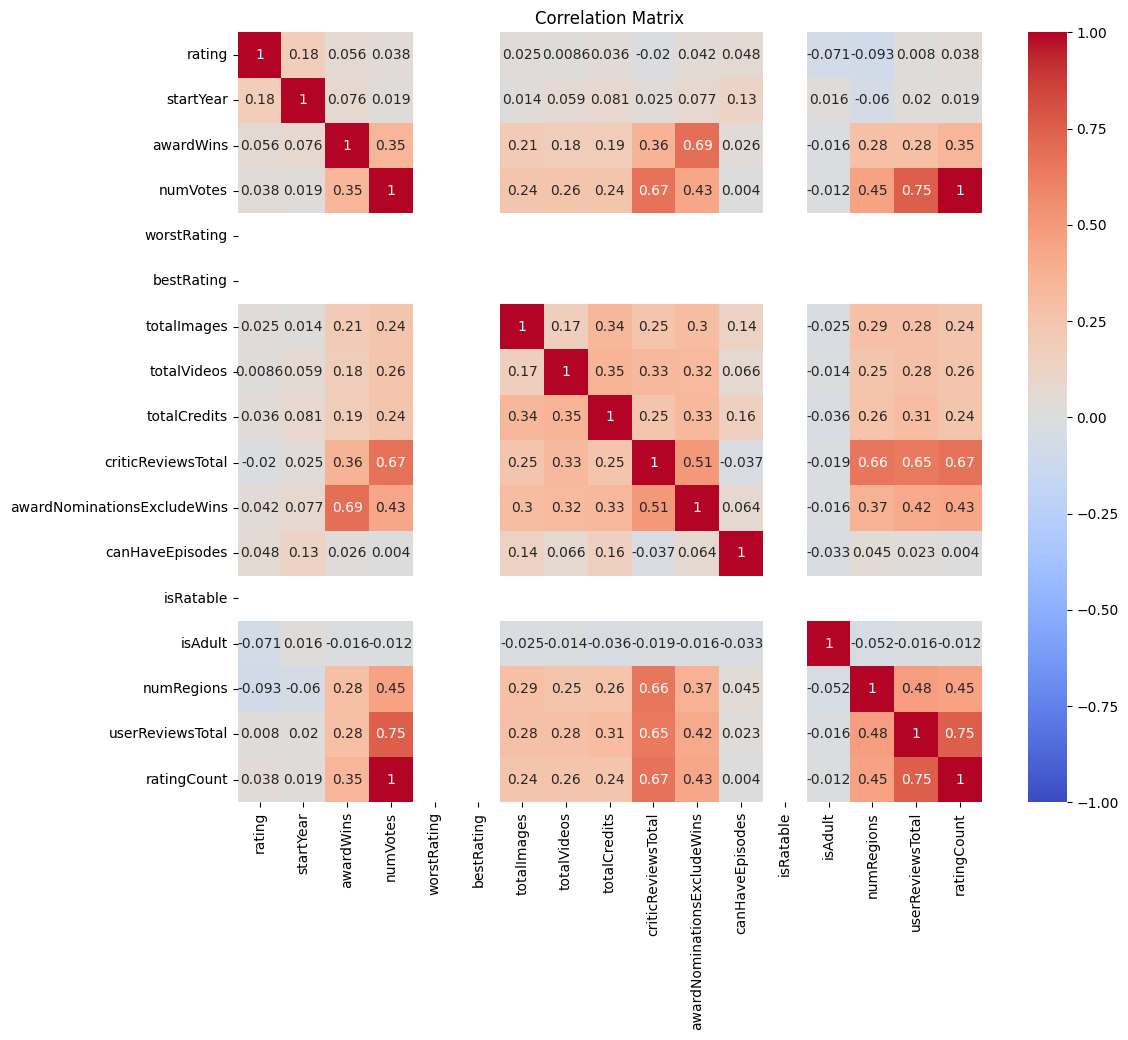

In [28]:
# Checking the presence of redundant numeric features to perform feature selection
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [29]:
high_corr = []

# Show correlations higher than 0.7.
filt_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)]
result = filt_corr.stack().reset_index()
result.columns = ['rowIndex', 'columnIndex', 'correlation']
result = result[result['rowIndex'] < result['columnIndex']]
print(result)

      rowIndex       columnIndex  correlation
0     numVotes  userReviewsTotal     0.752175
1     numVotes       ratingCount     1.000000
5  ratingCount  userReviewsTotal     0.752223


In [30]:
# Removing redundant features creating a single column for the # of ratings
df['num_ratings'] = round((df[['numVotes', 'userReviewsTotal', 'ratingCount']].mean(axis = 1)), 2) 

df = df.drop(columns = ['numVotes', 'userReviewsTotal', 'ratingCount'], axis=1)
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,worstRating,bestRating,totalImages,totalVideos,...,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,countryOfOrigin,genere_1,genere_2,genere_3,num_ratings
0,Neogenic Nightmare Chapter 3: Hydro-Man,7.5,1995,None,None,0.0,1,10,1,0,...,0,False,True,0,1,['US'],Action,Adventure,Animation,520.00
1,Looping,5.5,1982,None,None,0.0,1,10,1,0,...,0,False,True,0,1,['XWG'],Action,None,None,7.33
2,Idealnaya para,5.5,1992,None,None,0.0,1,10,1,0,...,0,False,True,0,1,['RU'],Comedy,None,None,25.67
3,MasterChef Celebrity México,5.5,2021,None,None,0.0,1,10,22,0,...,0,True,True,0,1,['MX'],Reality-TV,None,None,10.00
4,Seutateueob,7.5,2020,2020,80,1.0,1,10,347,2,...,1,True,True,0,32,['KR'],Comedy,Drama,Romance,10638.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,5.5,1942,None,None,0.0,1,10,4,0,...,0,False,True,0,14,['FR'],Comedy,None,None,50.00
16427,Haar Jeet,4.5,1990,None,None,0.0,1,10,2,0,...,0,False,True,0,1,['IN'],Action,Drama,Thriller,10.33
16428,Kotigobba 3,5.5,2021,None,140,0.0,1,10,39,3,...,5,False,True,0,5,['IN'],Action,Drama,Romance,1723.00
16429,Ator l'invincibile,3.5,1982,None,None,0.0,1,10,52,1,...,0,False,True,0,26,['IT'],Action,Adventure,Fantasy,2027.00


In [31]:
# Dealing with the endYear column
print(df['endYear'].isna().sum())

15617


In [32]:
# We can drop the column considering the percentage of missing values
print('Percentage of None values in endYear column:', (15617*100)/16431)
df = df.drop('endYear', axis = 1)
df

Percentage of None values in endYear column: 95.04594972917047


,originalTitle,rating,startYear,runtimeMinutes,awardWins,worstRating,bestRating,totalImages,totalVideos,totalCredits,...,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,countryOfOrigin,genere_1,genere_2,genere_3,num_ratings
0,Neogenic Nightmare Chapter 3: Hydro-Man,7.5,1995,None,0.0,1,10,1,0,21,...,0,False,True,0,1,['US'],Action,Adventure,Animation,520.00
1,Looping,5.5,1982,None,0.0,1,10,1,0,1,...,0,False,True,0,1,['XWG'],Action,None,None,7.33
2,Idealnaya para,5.5,1992,None,0.0,1,10,1,0,24,...,0,False,True,0,1,['RU'],Comedy,None,None,25.67
3,MasterChef Celebrity México,5.5,2021,None,0.0,1,10,22,0,56,...,0,True,True,0,1,['MX'],Reality-TV,None,None,10.00
4,Seutateueob,7.5,2020,80,1.0,1,10,347,2,47,...,1,True,True,0,32,['KR'],Comedy,Drama,Romance,10638.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,5.5,1942,None,0.0,1,10,4,0,45,...,0,False,True,0,14,['FR'],Comedy,None,None,50.00
16427,Haar Jeet,4.5,1990,None,0.0,1,10,2,0,22,...,0,False,True,0,1,['IN'],Action,Drama,Thriller,10.33
16428,Kotigobba 3,5.5,2021,140,0.0,1,10,39,3,129,...,5,False,True,0,5,['IN'],Action,Drama,Romance,1723.00
16429,Ator l'invincibile,3.5,1982,None,0.0,1,10,52,1,53,...,0,False,True,0,26,['IT'],Action,Adventure,Fantasy,2027.00


In [33]:
print(df['runtimeMinutes'].isna().sum())
print('Percentage of None values in runtimeMinutes column:', (4852*100)/16431)

4852
Percentage of None values in runtimeMinutes column: 29.52954780597651


In [34]:
# Worst rating e best rating: if they are all the same it's useless information
print('The worst ratings assigned are: ', df['worstRating'].value_counts())
print('The best rating assigned are: ', df['bestRating'].value_counts())

#It is a uniform column: does not give any specific information about the different instances, we can drop it
df = df.drop(columns = ['worstRating', 'bestRating'], axis = 1)

The worst ratings assigned are:  worstRating
1    16431
Name: count, dtype: int64
The best rating assigned are:  bestRating
10    16431
Name: count, dtype: int64


In [35]:
# Checking the isRatable column: if it has just True it is not informative
print("The values present in the isRatable column are: ", df['isRatable'].value_counts())

# All the same: therefore we can delete it
df = df.drop(['isRatable'], axis = 1)

The values present in the isRatable column are:  isRatable
True    16431
Name: count, dtype: int64


In [36]:
# Checking the isAdult column
df['isAdult'].value_counts()

# Qui potremmo decidere di eliminarla dato che appare nella colonna dei generi, ma forse è comodo averlo in binario

isAdult
0    16005
1      426
Name: count, dtype: int64

In [37]:
df.to_csv('data/train_processed.csv', index=False)